# Demonstrating the `tableone` package

In research papers, it is common for the first table ("Table 1") to display summary statistics of the study data. The `tableone` package is used to create this table. For an introduction to basic statistical reporting in biomedical journals, we recommend reading the [SAMPL Guidelines](http://www.equator-network.org/wp-content/uploads/2013/07/SAMPL-Guidelines-6-27-13.pdf). For more reading on accurate reporting in health research, visit the [EQUATOR Network](http://www.equator-network.org/).

## A note for users of `tableone`

While we have tried to use best practices in creating this package, automation of even basic statistical tasks can be unsound if done without supervision. We encourage use of `tableone` alongside other methods of descriptive statistics and, in particular, visualization to ensure appropriate data handling. 

It is beyond the scope of our documentation to provide detailed guidance on summary statistics, but as a primer we provide some considerations for choosing parameters when creating a summary table at: http://tableone.readthedocs.io/en/latest/bestpractice.html. 

*Guidance should be sought from a statistician when using `tableone` for a research study, especially prior to submitting the study for publication*.

## Suggested citation
If you use tableone in your study, please cite the following paper:

> Tom J Pollard, Alistair E W Johnson, Jesse D Raffa, Roger G Mark; *tableone*: An open source Python package for producing summary statistics for research papers, *JAMIA Open*, Volume 1, Issue 1, 1 July 2018, Pages 26–31, https://doi.org/10.1093/jamiaopen/ooy012

Download the BibTex file from: https://academic.oup.com/jamiaopen/downloadcitation/5001910?format=bibtex

## Installation

To install the package with pip, run the following command in your terminal: ``pip install tableone``. To install the package with Conda, run: ``conda install -c conda-forge tableone``. For more detailed installation instructions, refer to the [documentation](http://tableone.readthedocs.io/en/latest/install.html).

## Importing libraries

Before using the `tableone` package, we need to import it. We will also import `pandas` for loading our sample dataset and `matplotlib` for creating plots.

In [1]:
# import libraries
from tableone import TableOne
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading sample data

We begin by loading the data that we would like to summarize into a Pandas DataFrame. 
- Variables are in columns
- Encounters/observations are in rows.

In [2]:
# load sample data into a pandas dataframe
url="https://raw.githubusercontent.com/tompollard/tableone/master/data/pn2012_demo.csv"
data=pd.read_csv(url)

In [3]:
data.head()

,Age,SysABP,Height,Weight,ICU,MechVent,LOS,death
0,54,NaN,NaN,NaN,SICU,0,5,0
1,76,105.0,175.3,80.6,CSRU,1,8,0
2,44,148.0,NaN,56.7,MICU,0,19,0
3,68,NaN,180.3,84.6,MICU,0,9,0
4,88,NaN,NaN,NaN,MICU,0,4,0


## Example 1: Simple summary of data with Table 1

In this example we provide summary statistics across all of the data.

In [4]:
# view the tableone docstring
TableOne??

In [5]:
# create an instance of TableOne with the input arguments
# firstly, with no grouping variable
overall_table = TableOne(data, label_suffix=True)

In [6]:
# view first 10 rows of tableone
overall_table

isnull         overall
variable          level                       
n                                         1000
Age, mean (SD)               0   65.05 (17.18)
SysABP, mean (SD)          291  114.25 (40.16)
Height, mean (SD)          475  170.09 (22.06)
Weight, mean (SD)          302   82.93 (23.83)
ICU, n (%)        CCU        0      162 (16.2)
                  CSRU              202 (20.2)
                  MICU              380 (38.0)
                  SICU              256 (25.6)
MechVent, n (%)   0          0      540 (54.0)
                  1                 460 (46.0)
LOS, mean (SD)               0   14.16 (14.18)
death, n (%)      0          0      864 (86.4)
                  1                 136 (13.6)
[1] Warning, Hartigan's Dip Test reports possible multimodal distributions for: Age, SysABP, Height, LOS.
[2] Warning, Tukey test indicates far outliers in: Height, LOS.
[3] Warning, test for normality reports non-normal distributions for: Age, SysABP, Height, Weight, LOS.

**Summary of the table**:
- the first row ('`n`') displays a count of the encounters/observations in the input data.
- the '`isnull`' column displays a count of the null values for the particular variable.
- if categorical variables are not defined in the arguments, they are detected automatically.
- continuous variables (e.g. '`age`') are summarized by '`mean (std)`'.
- categorical variables (e.g. '`ascites`') are summarized by '`n (% of non-null values)`'.
- if `label_suffix=True`, "mean (SD); n (%);" etc are appended to the row label.

## Exploring the warning raised by Hartigan's Dip Test

Hartigan's Dip Test is a test for multimodality. The test has suggested that the `Age`, `SysABP`, and `Height` distributions may be multimodal. We'll plot the distributions here.

(-30, 250)

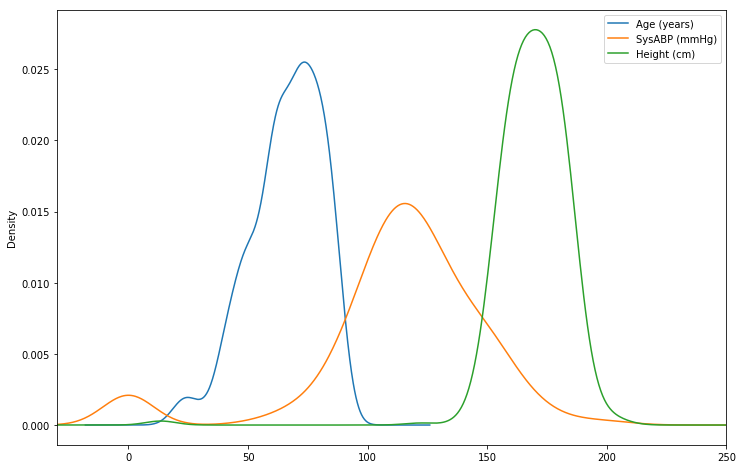

In [7]:
data[['Age','SysABP','Height']].dropna().plot.kde(figsize=[12,8])
plt.legend(['Age (years)', 'SysABP (mmHg)', 'Height (cm)'])
plt.xlim([-30,250])

## Exploring the warning raised by Tukey's rule

Tukey's rule has found far outliers in Height, so we'll look at this in a boxplot

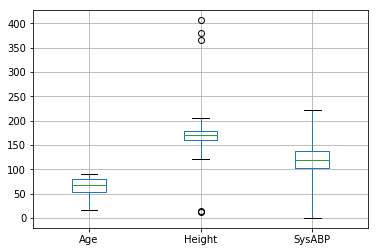

In [8]:
data[['Age','Height','SysABP']].boxplot(whis=3)
plt.show()

In both cases it seems that there are values that may need to be taken into account when calculating the summary statistics. For `SysABP`, a clearly bimodal distribution, the researcher will need to decide how to handle the peak at ~0, perhaps by cleaning the data and/or describing the issue in the summary table. For `Height`, the researcher may choose to report median, rather than mean.

## Example 2: Table 1 without stratification

In this example we provide summary statistics across all of the data, specifying columns, categorical variables, and non-normal variables.

In [9]:
# columns to be summarized
columns = ['Age', 'SysABP', 'Height', 'Weight', 'ICU', 'death']

# columns containing categorical variables
categorical = ['ICU', 'death']

# non-normal variables
nonnormal = ['Age']

# alternative labels
labels={'death': 'mortality'}

# create tableone with the input arguments
mytable = TableOne(data, columns=columns, categorical=categorical, 
nonnormal=nonnormal, labels=labels, label_suffix=True)
mytable

isnull              overall
variable          level                            
n                                              1000
Age, median (IQR)            0  68.00 [53.00,79.00]
SysABP, mean (SD)          291       114.25 (40.16)
Height, mean (SD)          475       170.09 (22.06)
Weight, mean (SD)          302        82.93 (23.83)
ICU, n (%)        CCU        0           162 (16.2)
                  CSRU                   202 (20.2)
                  MICU                   380 (38.0)
                  SICU                   256 (25.6)
mortality, n (%)  0          0           864 (86.4)
                  1                      136 (13.6)
[1] Warning, Hartigan's Dip Test reports possible multimodal distributions for: Age, SysABP, Height.
[2] Warning, Tukey test indicates far outliers in: Height.
[3] Warning, test for normality reports non-normal distributions for: Age, SysABP, Height, Weight.

**Summary of the table**:

- as before, except that the variables are explicitly defined in the input arguments.
- continuous variables are now summarized by '`median [IQR]`' if specified as `nonnormal`.
- the labels argument means that 'sex' is now shown as 'gender, and 'trt' is now 'treatment'.

## Example 3: Table 1 with stratification

In this example, we group data across a categorical variable.

In [10]:
# optionally, a categorical variable for stratification
groupby = ['death']

In [11]:
# create an instance of TableOne with the input arguments
grouped_table = TableOne(data, columns, categorical, groupby, nonnormal, label_suffix=True)

In [12]:
# view first 10 rows of tableone
grouped_table

Grouped by death                                          
                                  isnull                    0                    1
variable          level                                                           
n                                                         864                  136
Age, median (IQR)                      0  66.00 [52.75,78.00]  75.00 [62.00,83.00]
SysABP, mean (SD)                    291       115.36 (38.34)       107.57 (49.43)
Height, mean (SD)                    475       170.33 (23.22)       168.51 (11.31)
Weight, mean (SD)                    302        83.04 (23.58)        82.29 (25.40)
ICU, n (%)        CCU                  0          137 (15.86)           25 (18.38)
                  CSRU                            194 (22.45)             8 (5.88)
                  MICU                            318 (36.81)           62 (45.59)
                  SICU                            215 (24.88)           41 (30.15)
death, n (%)      0                    0          864 (100.0)                     
                  1                                                    136 (100.0)
[1] Warning, Hartigan's Dip Test reports possible multimodal distributions for: Age, Height, SysABP.
[2] Warning, Tukey test indicates far outliers in: Height, SysABP.
[3] Warning, test for normality reports non-normal distributions for: Age, Height, SysABP, Weight.

**Summary of the table**:
- data is now summarized across the groups specified in the `groupby` argument.
- as before, the summary statistics are either '`mean (std)`', '`median [IQR]`', or '`n (% of non-null values)`'.

## Computing p values

We can run a test to compute p values by setting the ``pval`` argument to True.

In [13]:
# create grouped_table with p values
grouped_table = TableOne(data, columns, categorical, groupby, nonnormal, label_suffix=True, pval = True)

In [14]:
# view first 10 rows of tableone
grouped_table

Grouped by death                                                                     
                                  isnull                    0                    1    pval              ptest
variable          level                                                                                      
n                                                         864                  136                           
Age, median (IQR)                      0  66.00 [52.75,78.00]  75.00 [62.00,83.00]  <0.001     Kruskal-Wallis
SysABP, mean (SD)                    291       115.36 (38.34)       107.57 (49.43)   0.134  Two Sample T-test
Height, mean (SD)                    475       170.33 (23.22)       168.51 (11.31)   0.304  Two Sample T-test
Weight, mean (SD)                    302        83.04 (23.58)        82.29 (25.40)   0.782  Two Sample T-test
ICU, n (%)        CCU                  0          137 (15.86)           25 (18.38)  <0.001        Chi-squared
                  CSRU                            194 (22.45)             8 (5.88)                           
                  MICU                            318 (36.81)           62 (45.59)                           
                  SICU                            215 (24.88)           41 (30.15)                           
death, n (%)      0                    0          864 (100.0)                       <0.001        Chi-squared
                  1                                                    136 (100.0)                           
[1] Warning, Hartigan's Dip Test reports possible multimodal distributions for: Age, Height, SysABP.
[2] Warning, Tukey test indicates far outliers in: Height, SysABP.
[3] Warning, test for normality reports non-normal distributions for: Age, Height, SysABP, Weight.

**Summary of the table**:
- the '`ptest`' column displays the name of the test used to compare the groups.
- the '`pval`' column displays the p value generated by the test in the '`ptest`' column, to 3 decimal places.

## Exporting the table to file (LaTeX, CSV, etc)

Tables can be exported to file in various formats, including:
- LaTeX
- CSV
- HTML

To export the table, call the relevant `to_<format>()` method on the DataFrame.

In [15]:
# Save table to LaTeX
fn = 'tableone.tex'
grouped_table.to_latex(fn)

In [16]:
# Save table to HTML
fn2 = 'tableone.html'
grouped_table.to_html(fn2)